In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pdb
import random
import maze as mz
import matplotlib.pyplot as plt
    
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

In [2]:
# (b) Illustrate an optimal policy for T=20

In [3]:
# Create an environment maze
env = mz.Maze(maze)
horizon = 20

In [9]:
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0,6,5);
path = env.simulate(start, policy, method);

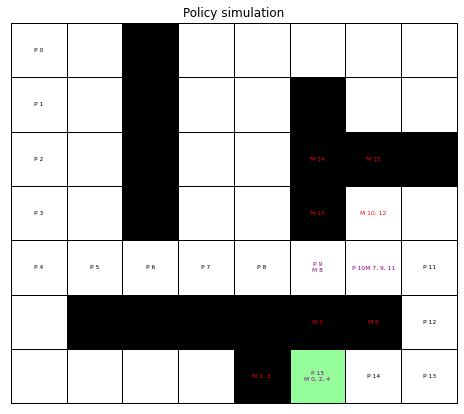

In [10]:
mz.animate_solution(maze, path)

In [ ]:
# (b) When the minotaur cannot stand still

In [29]:
# Create an environment maze
env = mz.Maze(maze)
max_horizon = 40

In [30]:
probabilities_escape = np.zeros(max_horizon)

In [31]:
# Finite horizon
for horizon in range(13,max_horizon):

    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    # Simulate the shortest path starting from position A
    method = 'DynProg';
    start  = (0,0,5,6);
    path = env.simulate(start, policy, method);
    
    no_runs = 100
    paths =[]

    win_count = 0
    dead_count = 0

    for i in range(no_runs):
        path = env.simulate(start, policy, method);
        player_path = [ el[:2] for el in path ]
        minotaur_path = [ el[2:] for el in path ]

        if 1 in [1 for i, j in zip(player_path, minotaur_path) if i == j]:
            dead_count += 1
        paths.append(path)
        if path[-1][:2]==(6, 5):
            win_count +=1

        #print("win_count ",win_count)
        #print("dead_count ",dead_count)

    probabilities_escape[horizon] = win_count/no_runs


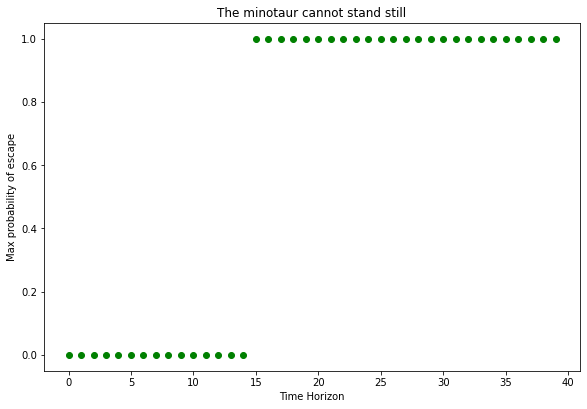

In [33]:
#print(probabilities_escape)
plt.figure(figsize=(9.6,6.4))
plt.plot(range(0,max_horizon),probabilities_escape, 'go')
plt.ylabel('Max probability of escape')
plt.title('The minotaur cannot stand still')
plt.xlabel('Time Horizon')
#plt.show()
plt.savefig('Q1b_max_prob_escape_cannot_stand_still.png')

In [13]:
# (b) When the minotaur can stand still

In [ ]:
# Create an environment maze
env = mz.Maze(maze, True)
max_horizon = 40

In [ ]:
probabilities_escape_stay = np.zeros(max_horizon)

In [ ]:
# Finite horizon
for horizon in range(13,max_horizon):

    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    # Simulate the shortest path starting from position A
    method = 'DynProg';
    start  = (0,0,5,6);
    path = env.simulate(start, policy, method);
    
    no_runs = 10000
    paths =[]

    win_count = 0
    dead_count = 0

    for i in range(no_runs):
        path = env.simulate(start, policy, method);
        player_path = [ el[:2] for el in path ]
        minotaur_path = [ el[2:] for el in path ]

        if 1 in [1 for i, j in zip(player_path, minotaur_path) if i == j]:
            dead_count += 1
        paths.append(path)
        if path[-1][:2]==(6, 5):
            win_count +=1

        #print("win_count ",win_count)
        #print("dead_count ",dead_count)

    probabilities_escape_stay[horizon] = win_count/no_runs

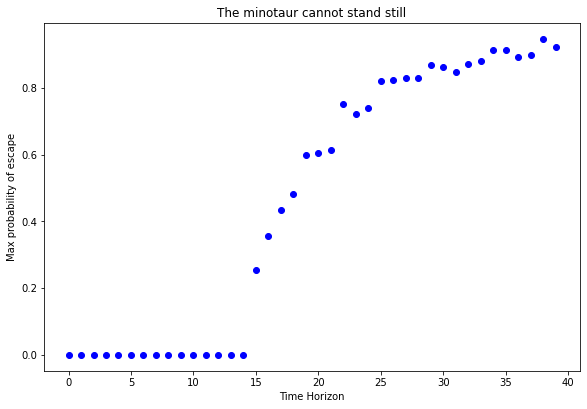

In [26]:
plt.figure(figsize=(9.6,6.4))
plt.plot(range(0,max_horizon),probabilities_escape_stay, 'bo')
plt.title("The minotaur cannot stand still")
plt.ylabel('Max probability of escape')
plt.xlabel('Time Horizon')
plt.savefig('Q1b_max_prob_escape_can_stand_still.png')

In [ ]:
# (c) When the player's life is geometrically distributed.

In [8]:
# Create an environment maze
env = mz.Maze(maze)
gamma = 29/30
eps = 0.001

In [9]:
# Solve the MDP problem with value iteration
V, policy= mz.value_iteration(env,gamma,eps);

# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0,6,5);
path = env.simulate(start, policy, method);

In [10]:
# Caluclate probability of escaping with value iteration
no_runs = 10000
paths =[]

win_count = 0
dead_count = 0

for i in range(no_runs):
    path = env.simulate(start, policy, method);
    player_path = [ el[:2] for el in path ]
    minotaur_path = [ el[2:] for el in path ]

    if 1 in [1 for i, j in zip(player_path, minotaur_path) if i == j]:
        dead_count += 1
    paths.append(path)
    if path[-1][:2]==(6, 5):
        win_count +=1

print("Probability of escape ", win_count/no_runs, " in ", no_runs, " runs.")

Probability of escape  0.7728  in  10000  runs.
